In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pygmid import Lookup 

#### Technology data

In [3]:
nch= Lookup(r"C:\Users\zinou\Documents\repos\RTAM_Challenge\data\nfet_01v8_lvt.mat")

#### Design choices

In [4]:
l2=1
gm_id_values = np.linspace(5, 22, 100)  
gm = 1e-3
id_in = 50e-6

#### Sizing and Benchmarking

##### W2(gm/ID)

W2 for gm/ID=10, L2=1000 nm: 21.400 um


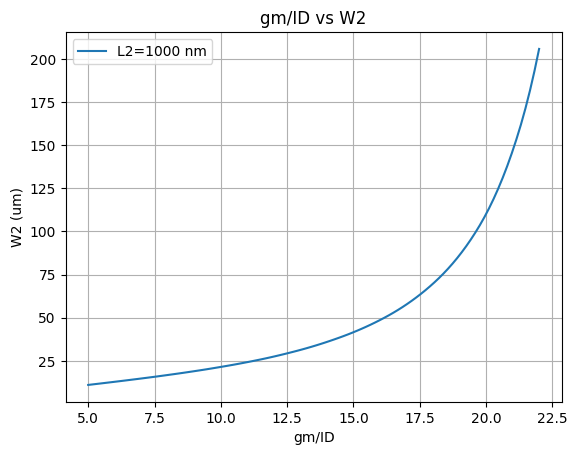

In [5]:
plt.figure()
 
w_values = []  
for gm_id in gm_id_values:
    jd = nch.lookup("ID_W", GM_ID=gm_id, L=l2) 
    id = gm / gm_id  
    w = id / jd  
    w_values.append(w) 

# Find W for target gm/ID = 20
w_target = w_values[np.argmin(np.abs(gm_id_values - 10))]
print(f"W2 for gm/ID={10}, L2={l2*1e3:.0f} nm: {w_target:.3f} um")

    # Convert W values to NumPy array for plotting
w_values = np.array(w_values)
plt.plot(gm_id_values, w_values, label=f"L2={l2 * 1e3:.0f} nm") 

plt.xlabel("gm/ID")
plt.ylabel("W2 (um)")
plt.title("gm/ID vs W2")
plt.legend()  
plt.grid(True)  
plt.show()


#### ro2(gm/ID)

ro2 for gm/ID=10, L2=1000 nm: 8.855e+04 Ω


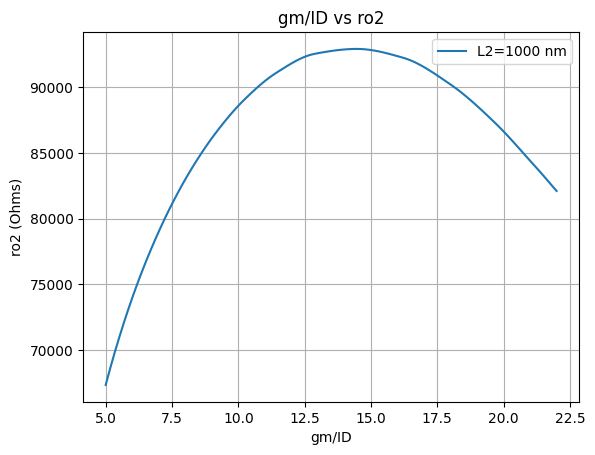

In [6]:
gm_gds_values = nch.lookup("GM_GDS", GM_ID=gm_id_values, L=l2)

# Compute GDS and ro 
ro_values = []
for gm_gds in gm_gds_values:
   #print(f"gm/gds: {gm_gds}")
    if gm_gds > 0:  
        gds = gm / gm_gds  
        #print(f"gds: {gds}")
        ro = 1 / gds  
        ro_values.append(ro)
    else:
        ro_values.append(np.nan)  

ro_target = ro_values[np.argmin(np.abs(gm_id_values - 10))]
print(f"ro2 for gm/ID={10}, L2={l2 * 1e3:.0f} nm: {ro_target:.3e} Ω")  

ro_values = np.array(ro_values)

plt.figure()
plt.plot(gm_id_values, ro_values, label=f"L2={l2 * 1e3:.0f} nm")
plt.xlabel("gm/ID")
plt.ylabel("ro2 (Ohms)")
plt.title("gm/ID vs ro2")
plt.legend()
plt.grid()
plt.show()

#### W3(gm/ID)

W3 for gm/ID=15, L=500 nm: 19.568 um


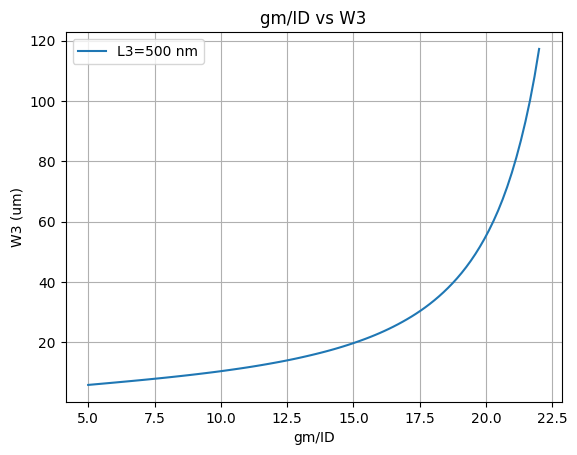

In [16]:
l3=0.5
plt.figure()
 
w_values = []  
for gm_id in gm_id_values:
    jd = nch.lookup("ID_W", GM_ID=gm_id, L=l3) 
    id = gm / gm_id  
    w = id / jd  
    w_values.append(w) 

# Find W for target gm/ID = 20
w_target = w_values[np.argmin(np.abs(gm_id_values - 15))]
print(f"W3 for gm/ID={15}, L={l3*1e3:.0f} nm: {w_target:.3f} um")

    # Convert W values to NumPy array for plotting
w_values = np.array(w_values)
plt.plot(gm_id_values, w_values, label=f"L3={l3 * 1e3:.0f} nm") 

plt.xlabel("gm/ID")
plt.ylabel("W3 (um)")
plt.title("gm/ID vs W3")
plt.legend()  
plt.grid(True)  
plt.show()

#### W5(gm/ID)

W5 for gm/ID=5, L5=500 nm: 1.461 um


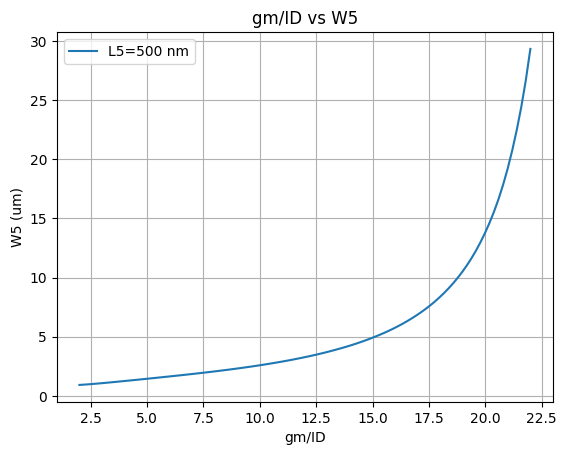

In [12]:
gm5= 250e-6
gm_id_values2 = np.linspace(2, 22, 100)  
plt.figure()
w_values = []  
for gm_id in gm_id_values2:
    jd = nch.lookup("ID_W", GM_ID=gm_id, L=l3) 
    id = gm5 / gm_id  
    w = id / jd  
    w_values.append(w) 

# Find W for target gm/ID = 20
w_target = w_values[np.argmin(np.abs(gm_id_values2 - 5))]
print(f"W5 for gm/ID={5}, L5={l3*1e3:.0f} nm: {w_target:.3f} um")

    # Convert W values to NumPy array for plotting
w_values = np.array(w_values)
plt.plot(gm_id_values2, w_values, label=f"L5={l3 * 1e3:.0f} nm") 

plt.xlabel("gm/ID")
plt.ylabel("W5 (um)")
plt.title("gm/ID vs W5")
plt.legend()  
plt.grid(True)  
plt.show()

#### gm/ID (VGS5)

vgs for gm/ID=5,L=500 nm: 1.3068460290324637


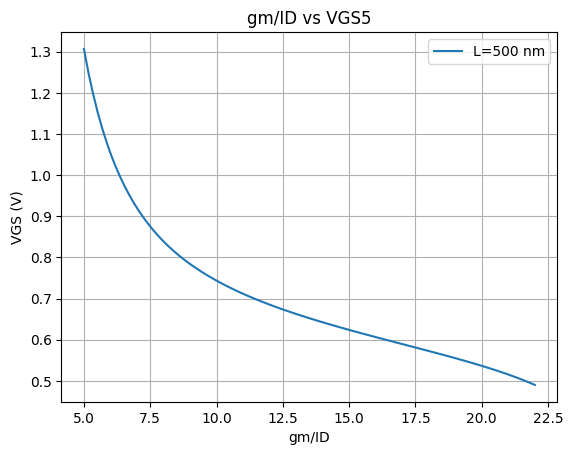

In [15]:
vgs_values = []  
for gm_id in gm_id_values2:
    vgs_value = nch.look_upVGS(GM_ID=gm_id, L=l3)  
    vgs_values.append(vgs_value)
vgs_target=vgs_values[np.argmin(np.abs(gm_id_values-5))]
print(f"vgs for gm/ID={5},L={l3*1e3:.0f} nm: {vgs_target}")
vgs_values = np.array(vgs_values)
plt.plot(gm_id_values, vgs_values, label=f"L={l3 * 1e3:.0f} nm")  
plt.xlabel("gm/ID")
plt.ylabel("VGS (V)")
plt.title("gm/ID vs VGS5")
plt.legend()  
plt.grid(True)  
plt.show()

